In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
df = pd.read_csv('/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [84]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [86]:
df = df.drop(['Invoice ID', 'Date', 'Time'], axis = 1)

In [87]:
## Data Visualization
df['Gender'].value_counts()

Gender
Female    501
Male      499
Name: count, dtype: int64

In [88]:
## Males and Females have shopped approximately the same!

In [89]:
## creating dummies for gender columns to make Male = 0 & Female = 1

gender_dummies = pd.get_dummies(df['Gender'],dtype=int)
gender_dummies.head()

,Female,Male
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


In [90]:
## joining the GENDER back to main data
df = pd.concat([df, gender_dummies], axis =1)
df

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,Female,Male
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,1,0
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,1,0
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,0,1
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,0,1
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,Ewallet,40.35,4.761905,2.0175,6.2,0,1
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,Ewallet,973.80,4.761905,48.6900,4.4,1,0
997,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,Cash,31.84,4.761905,1.5920,7.7,0,1
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,Cash,65.82,4.761905,3.2910,4.1,0,1


<Axes: xlabel='Product line', ylabel='Female'>

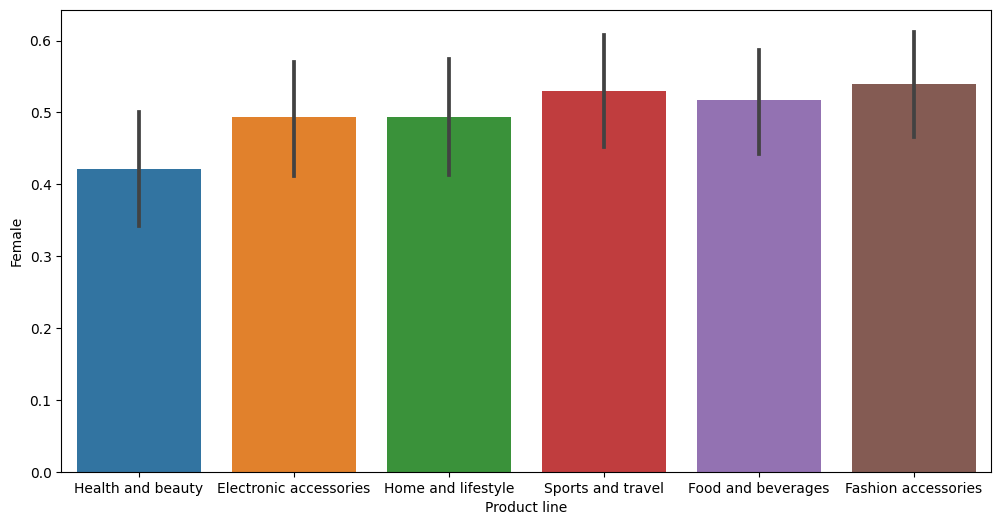

In [91]:
## bar plot to show product categories based on Gender
plt.figure(figsize = (12,6))
sns.barplot(x = 'Product line', y = 'Female', data = df)


<Axes: xlabel='Product line', ylabel='Male'>

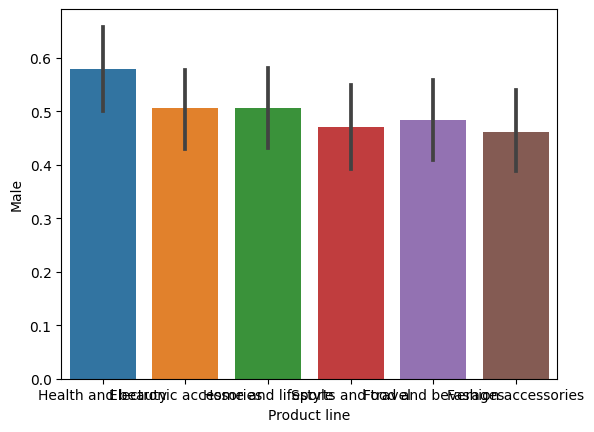

In [92]:
sns.barplot(x = 'Product line', y = 'Male', data = df)

In [93]:
## to show number of customers per city
place_df = pd.DataFrame(df['City'].value_counts())
place_df

,count
City,
Yangon,340
Mandalay,332
Naypyitaw,328


In [94]:
## Yangon City is the city most customers prefer to shop but the other city also have the approximate number of customers.

In [95]:
## Payments method analysis
pay_df = pd.DataFrame(df['Payment'].value_counts())
pay_df

,count
Payment,
Ewallet,345
Cash,344
Credit card,311


In [96]:
## EWallet and Cash share the same percentage/count whearas credit card is used the least amongst all the payment methods.

<Axes: xlabel='Product line', ylabel='gross income'>

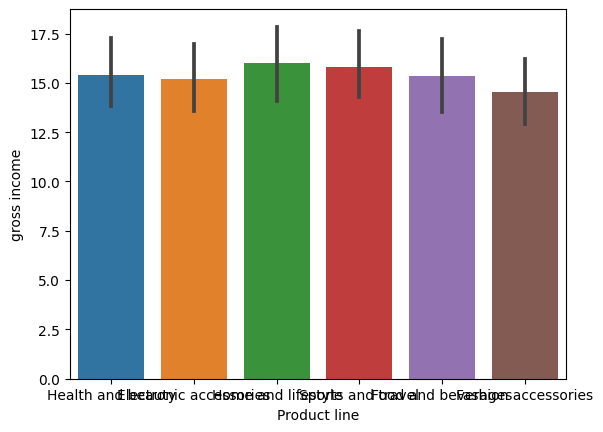

In [97]:
## Gross Income plot for the different Product line
sns.barplot(x = df['Product line'], y = df['gross income'])

In [98]:
## Home & Lifestyle Product line is earning the most profits for the supermarket while Fashion Accessories is earning the least.

([<matplotlib.axis.XTick at 0x7c2683e9c340>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

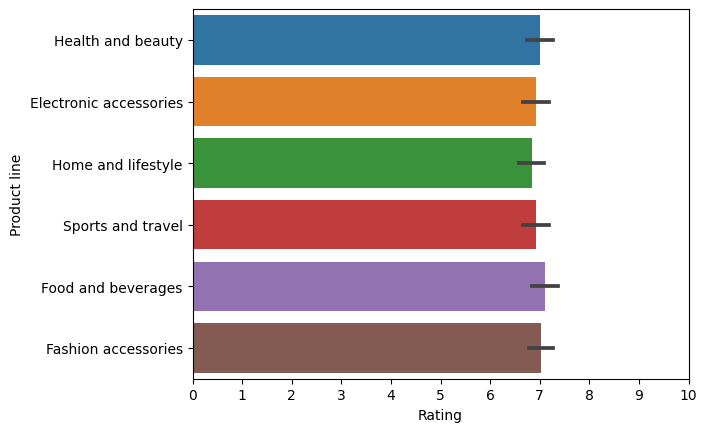

In [99]:
## Rating of each Product Line
xdata = [0,1,2,3,4,5,6,7,8,9,10]
sns.barplot(y = df['Product line'] , x = df['Rating'])
plt.xticks(xdata)

In [100]:
## The Food & Beverage holds the highest average ratings and Home & Lifestyle has the lowest average rating, which is weird since the Home & Lifestyle brings in the most profits and still has the lowest average rating.

<Axes: xlabel='Total', ylabel='Product line'>

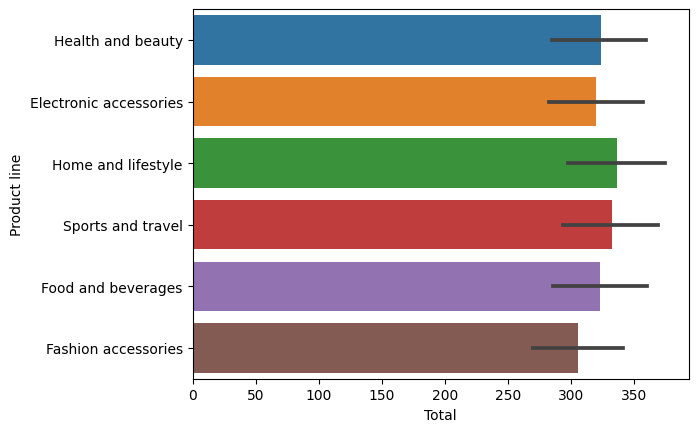

In [101]:
## Total bills for each product line
sns.barplot(x = df['Total'] , y = df['Product line'])

In [102]:
## We can infer that it is true that Home & Lifestyle is the most sold product in the supermarket hence bringing in the most profits and is not dependent on quality of the product(as it lowest amongst the products).

/tmp/ipykernel_30/2193044244.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Quantity'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


([<matplotlib.axis.XTick at 0x7c2683d8ea70>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15')])

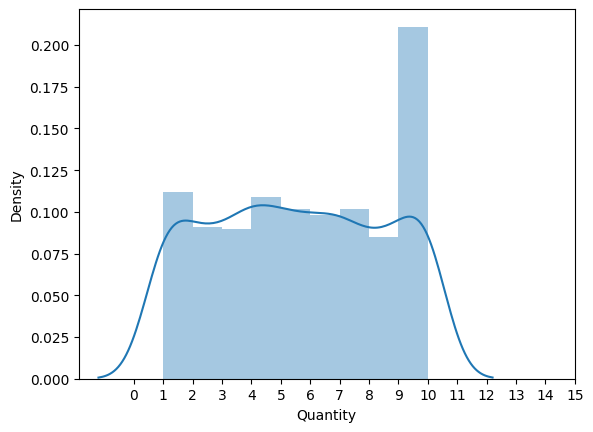

In [103]:
## Quantity Sold
xdata = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
sns.distplot(df['Quantity'])
plt.xticks(xdata)

In [104]:
## Most of the customers buys 10 number of items when shopping in the supermarket.
## This can be used to leverage customers to buy more items by bringing in a scheme/offers for customers who buy atleast 10items

In [105]:
quantity_df = pd.DataFrame(df['Quantity'].value_counts())
quantity_df

,count
Quantity,
10,119
1,112
4,109
7,102
5,102
6,98
9,92
2,91
3,90


In [106]:
sns.heatmap(df.corr())

ValueError: could not convert string to float: 'A'

In [110]:
'''
Inference from the Analysis
Total Customers = 1000
Total Females = 501
Total Males = 499
Min Rating = 4
Max Rating = 10
Average Rating = 6.97
Best Average Rating in Food & Beverages
Max Average Gross Income in Home & Lifestyle
Min Average Gross Income in Fashion Accessories
Maximum customers buys 10 quantities
Max Average total bill in Home and lifestyle
Min Average total bill in Fashion Accessories
Maximum People pays through e-wallet
Maximum people comes from Yangon City
Max Average Sales of Fashion Accessories is from Females
Max Average Sales of Health & Beauty is from Males 
'''

'\nInference from the Analysis\nTotal Customers = 1000\nTotal Females = 501\nTotal Males = 499\nMin Rating = 4\nMax Rating = 10\nAverage Rating = 6.97\nBest Average Rating in Food & Beverages\nMax Average Gross Income in Home & Lifestyle\nMin Average Gross Income in Fashion Accessories\nMaximum customers buys 10 quantities\nMax Average total bill in Home and lifestyle\nMin Average total bill in Fashion Accessories\nMaximum People pays through e-wallet\nMaximum people comes from Yangon City\nMax Average Sales of Fashion Accessories is from Females\nMax Average Sales of Health & Beauty is from Males \n'